In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('../dataset/dataset.csv')


In [16]:
fitur = ['elevation_m', 'curah_hujan_mm', 'jarak_sungai_m',
         'kemiringan_persen','banjir_historis']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[fitur])


In [17]:
# === 4. Jalankan K-Means ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['klaster'] = kmeans.fit_predict(data_scaled)


In [18]:
# === 5. Pemetaan label klaster ke zonasi ===
mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}

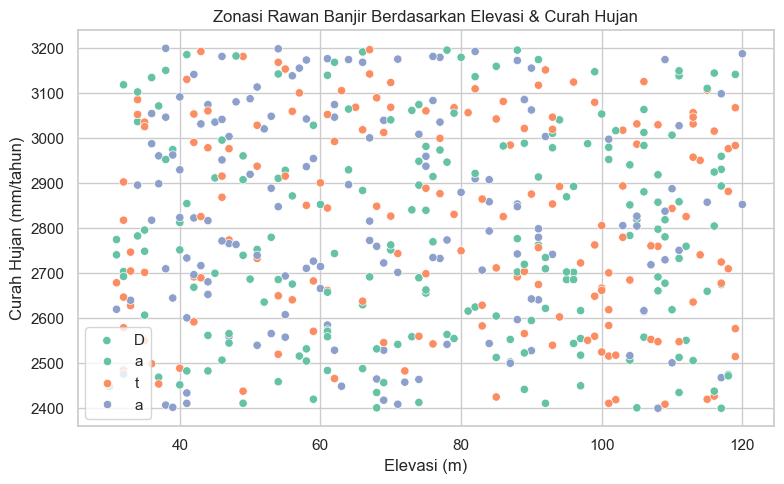

In [19]:
# Urutkan berdasarkan elevasi rata-rata per klaster (agar labelnya masuk akal)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=fitur)
order = centers['elevation_m'].argsort().values
label_map = {old: mapping[new] for new, old in enumerate(order)}
data['klaster_banjir'] = data['klaster'].map(label_map)
# === 6. Simpan hasilnya ke CSV ===
data.to_csv("hasil_klaster_banjir.csv", index=False)
# === 7. Visualisasi ===
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='elevation_m', y='curah_hujan_mm', hue='klaster_banjir', palette='Set2')
plt.title("Zonasi Rawan Banjir Berdasarkan Elevasi & Curah Hujan")
plt.xlabel("Elevasi (m)")
plt.ylabel("Curah Hujan (mm/tahun)")
plt.tight_layout()
plt.legend("Data Titik Zonasi")
plt.show()

In [20]:
claster = pd.read_csv('hasil_klaster_banjir.csv')
print(claster)

      id  latitude   longitude  elevation_m  curah_hujan_mm  jarak_sungai_m  \
0      1 -0.842509  123.067926           76            2915              58   
1      2 -0.830986  123.061444           41            3131              51   
2      3 -0.835360  123.052381           91            2763             175   
3      4 -0.838027  123.072552          109            2781              91   
4      5 -0.846880  123.067389          117            2931             300   
..   ...       ...         ...          ...             ...             ...   
495  496 -0.842933  123.043663           87            2500             206   
496  497 -0.838327  123.076693           90            2643             276   
497  498 -0.848445  123.045473           53            2889             277   
498  499 -0.830512  123.078009           49            2411              83   
499  500 -0.830276  123.057840           66            2638              17   

     kemiringan_persen     landuse  banjir_historis